<a href="https://colab.research.google.com/github/mimomaina/machine-learning_002/blob/main/Female_births_CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load dataset

In [ ]:
df= pd.read_csv('/content/daily-total-female-births-CA.csv')

# Data cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [ ]:
# check for unique values in date
df['date'].unique()

array(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
       '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
       '1959-01-09', '1959-01-10', '1959-01-11', '1959-01-12',
       '1959-01-13', '1959-01-14', '1959-01-15', '1959-01-16',
       '1959-01-17', '1959-01-18', '1959-01-19', '1959-01-20',
       '1959-01-21', '1959-01-22', '1959-01-23', '1959-01-24',
       '1959-01-25', '1959-01-26', '1959-01-27', '1959-01-28',
       '1959-01-29', '1959-01-30', '1959-01-31', '1959-02-01',
       '1959-02-02', '1959-02-03', '1959-02-04', '1959-02-05',
       '1959-02-06', '1959-02-07', '1959-02-08', '1959-02-09',
       '1959-02-10', '1959-02-11', '1959-02-12', '1959-02-13',
       '1959-02-14', '1959-02-15', '1959-02-16', '1959-02-17',
       '1959-02-18', '1959-02-19', '1959-02-20', '1959-02-21',
       '1959-02-22', '1959-02-23', '1959-02-24', '1959-02-25',
       '1959-02-26', '1959-02-27', '1959-02-28', '1959-03-01',
       '1959-03-02', '1959-03-03', '1959-03-04', '1959-

In [ ]:
#convert Date to DateTime
df['date']= pd.to_datetime(df['date'])

In [ ]:
#setting frequency


# Setting time/date column as index

In [ ]:
df.set_index('date', inplace=True)

# Visualising

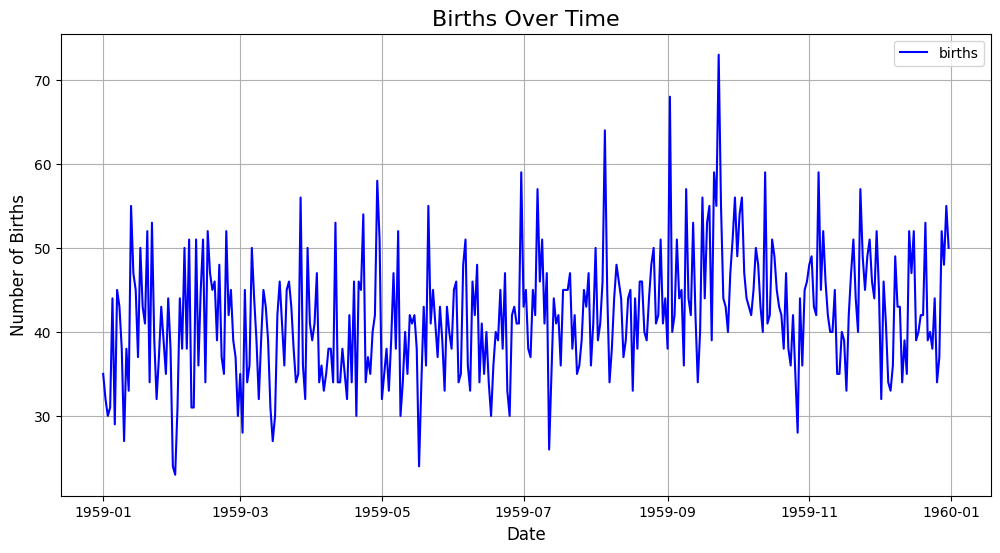

In [ ]:
# Plot births over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['births'], label='births', color='blue')
plt.title('Births Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Births', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


# Checking for stationarity

p-value>0.05 (non-stationary)
p-value <= 0.05 ( stationary)

In [ ]:
#Augmented Dickey-Fuller (ADF) test
result = adfuller(df['births'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -4.808291253559765
p-value: 5.2434129901498554e-05


p-value < 0.05 . Reject null hypothesis.(Data is stationary)

# Decomposing time series

Check for trend, seasonality, cyclical,noise

In [ ]:
decompose_result = seasonal_decompose(df['births'], model='multiplicative', period=12)

In [ ]:
decompose_result = seasonal_decompose(df['births'], model='additive', period=12)

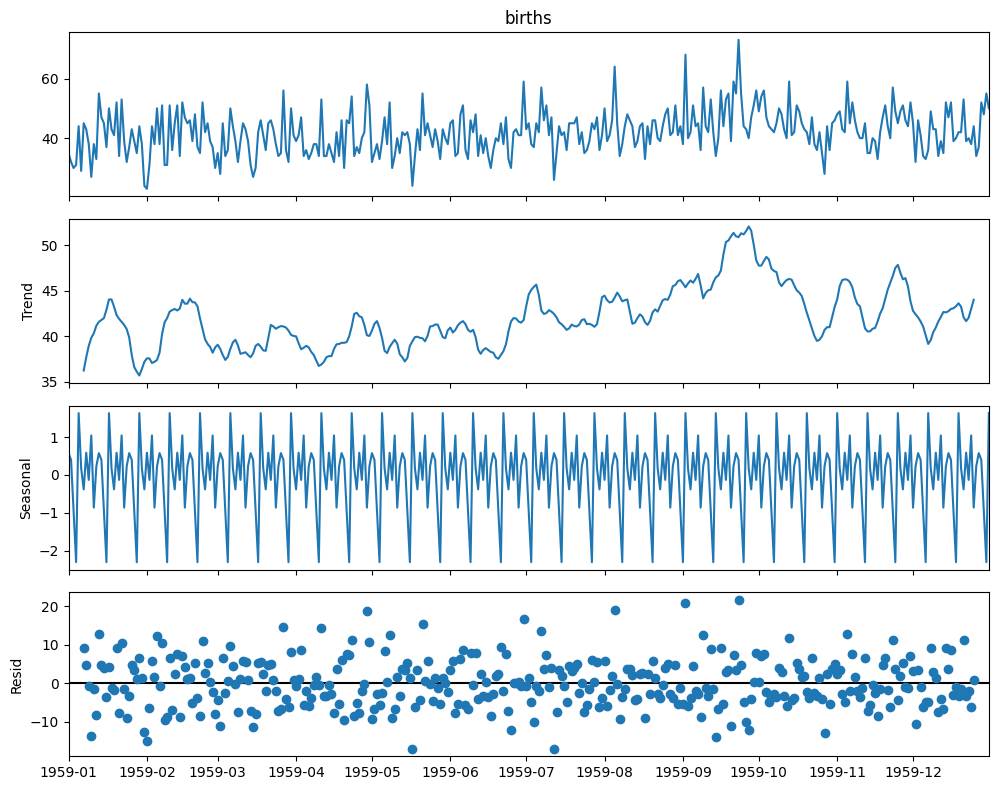

In [ ]:
# Plot decomposition
plt.rcParams.update({'figure.figsize': (10, 8)})
decompose_result.plot()
plt.show()

# ACF & PACF Plot

<Figure size 1000x500 with 0 Axes>

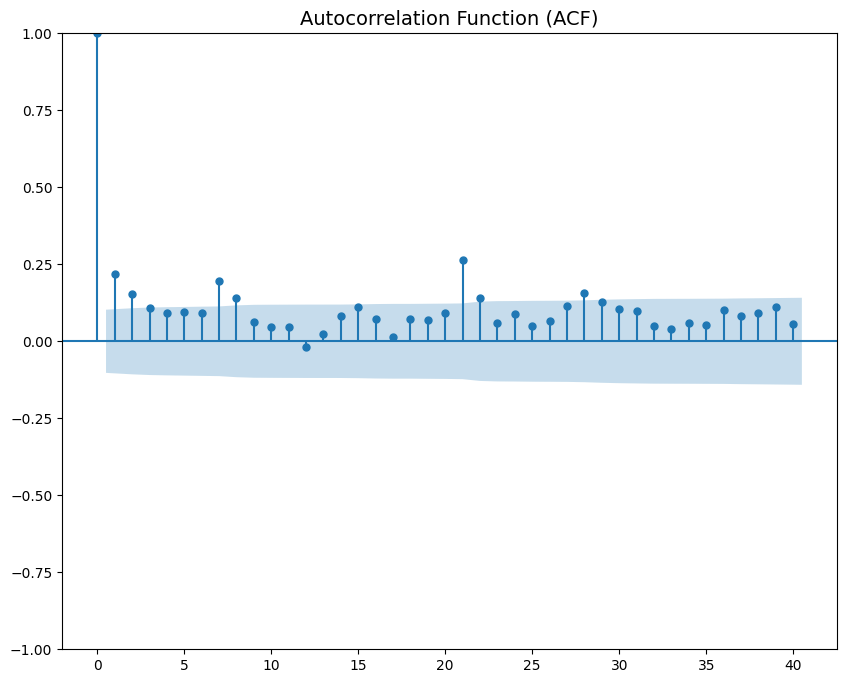

In [ ]:
# Plot ACF
plt.figure(figsize=(10, 5))
plot_acf(df['births'], lags=40, alpha=0.05)
plt.title('Autocorrelation Function (ACF)', fontsize=14)
plt.show()

<Figure size 1000x500 with 0 Axes>

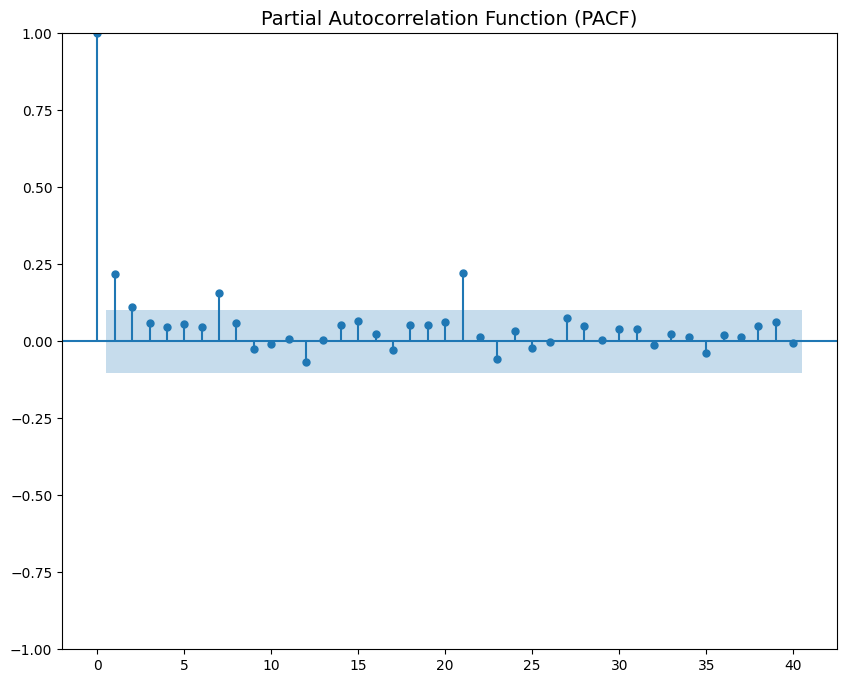

In [ ]:
# Plot PACF
plt.figure(figsize=(10, 5))
plot_pacf(df['births'], lags=40, alpha=0.05, method='ywm')  # Use 'ywm' for PACF calculations
plt.title('Partial Autocorrelation Function (PACF)', fontsize=14)
plt.show()


# Train &Test split data(chronologically)

In [ ]:
split_ratio = 0.8
split_index = int(len(df) * split_ratio)
train = df['births'][:split_index]
test = df['births'][split_index:]


In [ ]:
print(f"Training data length: {len(train)}, Testing data length: {len(test)}")

Training data length: 292, Testing data length: 73


# Modelling

Low AIC, BIC, low MAE

In [ ]:
model = ARIMA(train, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 births   No. Observations:                  292
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -988.202
Date:                Tue, 14 Jan 2025   AIC                           1984.404
Time:                        06:25:15   BIC                           1999.111
Sample:                    01-01-1959   HQIC                          1990.295
                         - 10-19-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.2332      4.542      9.298      0.000      33.331      51.135
ar.L1          0.9932      0.016     61.009      0.000       0.961       1.025
ma.L1         -0.9447      0.041    -23.314      0.0

In [ ]:
# SARIMA model
sarima_model = SARIMAX(train,
                       order=(1,1,1),
                       seasonal_order=(1,1,1, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_results = sarima_model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


# Forecasting

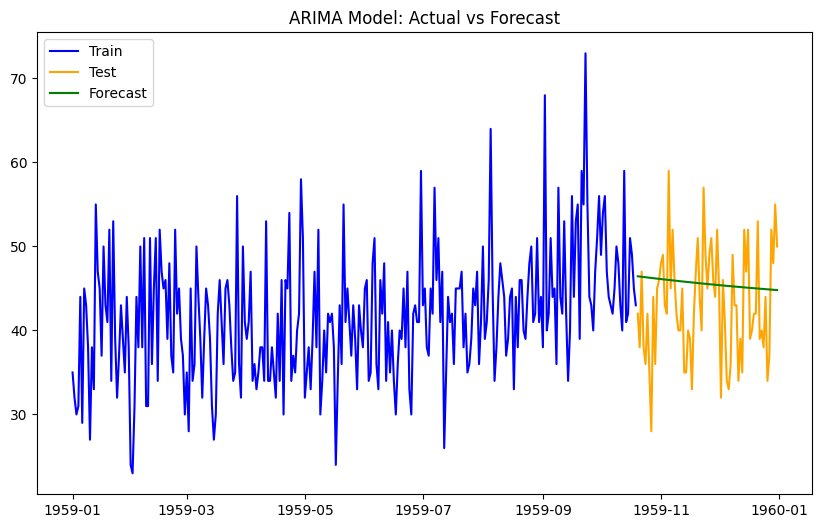

In [ ]:
# Forecast for the test set
forecast = model_fit.forecast(steps=len(test))

# Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.legend(loc='upper left')
plt.title('ARIMA Model: Actual vs Forecast')
plt.show()




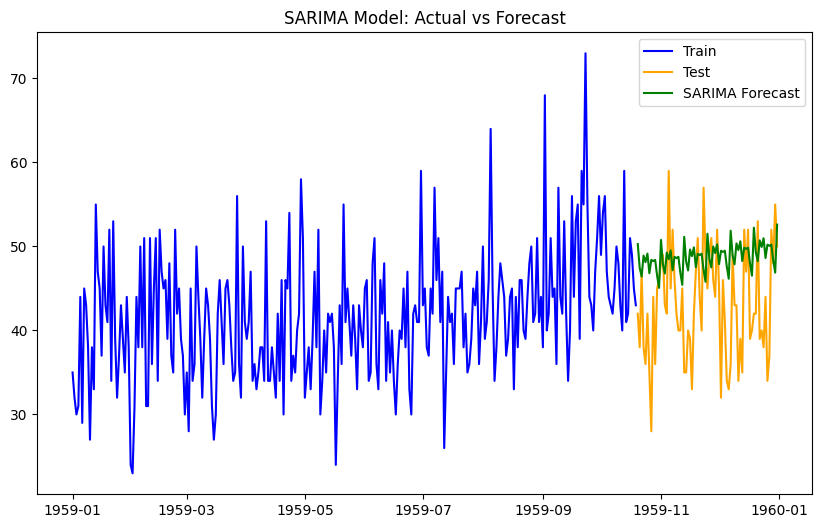

In [ ]:
# Forecast on test data
sarima_forecast = sarima_results.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='green')
plt.legend()
plt.title('SARIMA Model: Actual vs Forecast')
plt.show()

# Evaluate model's performance

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Squared Error: 48.59
Root Mean Squared Error: 6.97


In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test, sarima_forecast)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Squared Error: 78.64
Root Mean Squared Error: 8.87
